# Bike_Sharing

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math
import pickle


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                            ConfusionMatrixDisplay,accuracy_score,f1_score,
                            mean_squared_error, mean_absolute_error, max_error,
                            r2_score, explained_variance_score)

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF,WhiteKernel,DotProduct
from sklearn.neural_network import MLPRegressor

## Loading Data

In [2]:
Dataset = pd.read_csv('Regression_Datasets/5_Bike_Sharing/Bike_Sharing.csv', delimiter=',') 
Dataset.head() 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Prepration And Analysis

In [3]:
data= Dataset.iloc[:,2:].drop(['casual','registered'],axis =1)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
data.shape

(17379, 13)

In [5]:
data.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [6]:
print(np.count_nonzero(data==np.nan))
print(np.count_nonzero(data=='?'))

0
0


In [7]:
# for col in data:
#     print(data[col].unique())
#     print("\n")
data.apply(lambda x: len(x.unique()))

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
cnt           869
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


<AxesSubplot:>

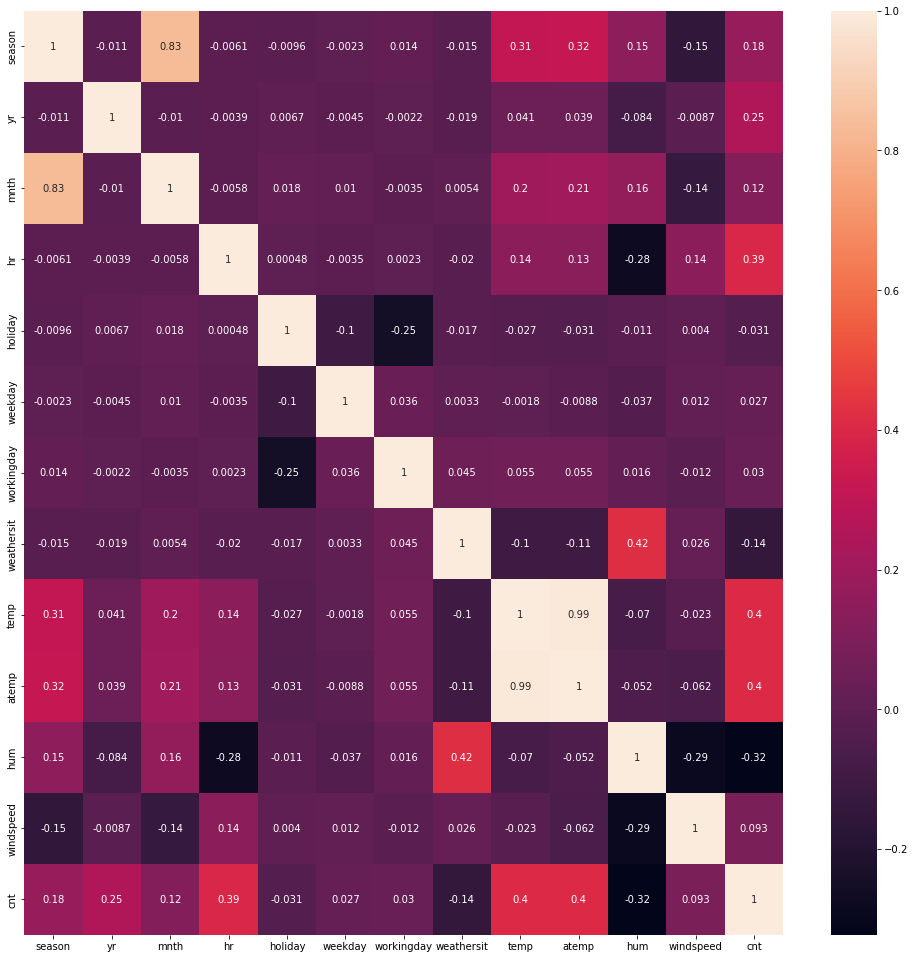

In [10]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr(), annot =True )

<AxesSubplot:>

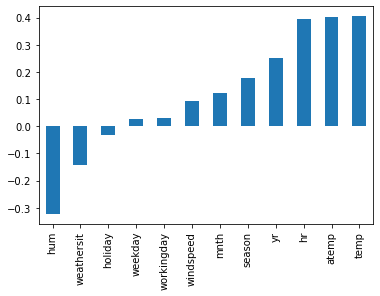

In [11]:
cor = data.corr()['cnt'][:-1].sort_values()
cor.plot(kind="bar")

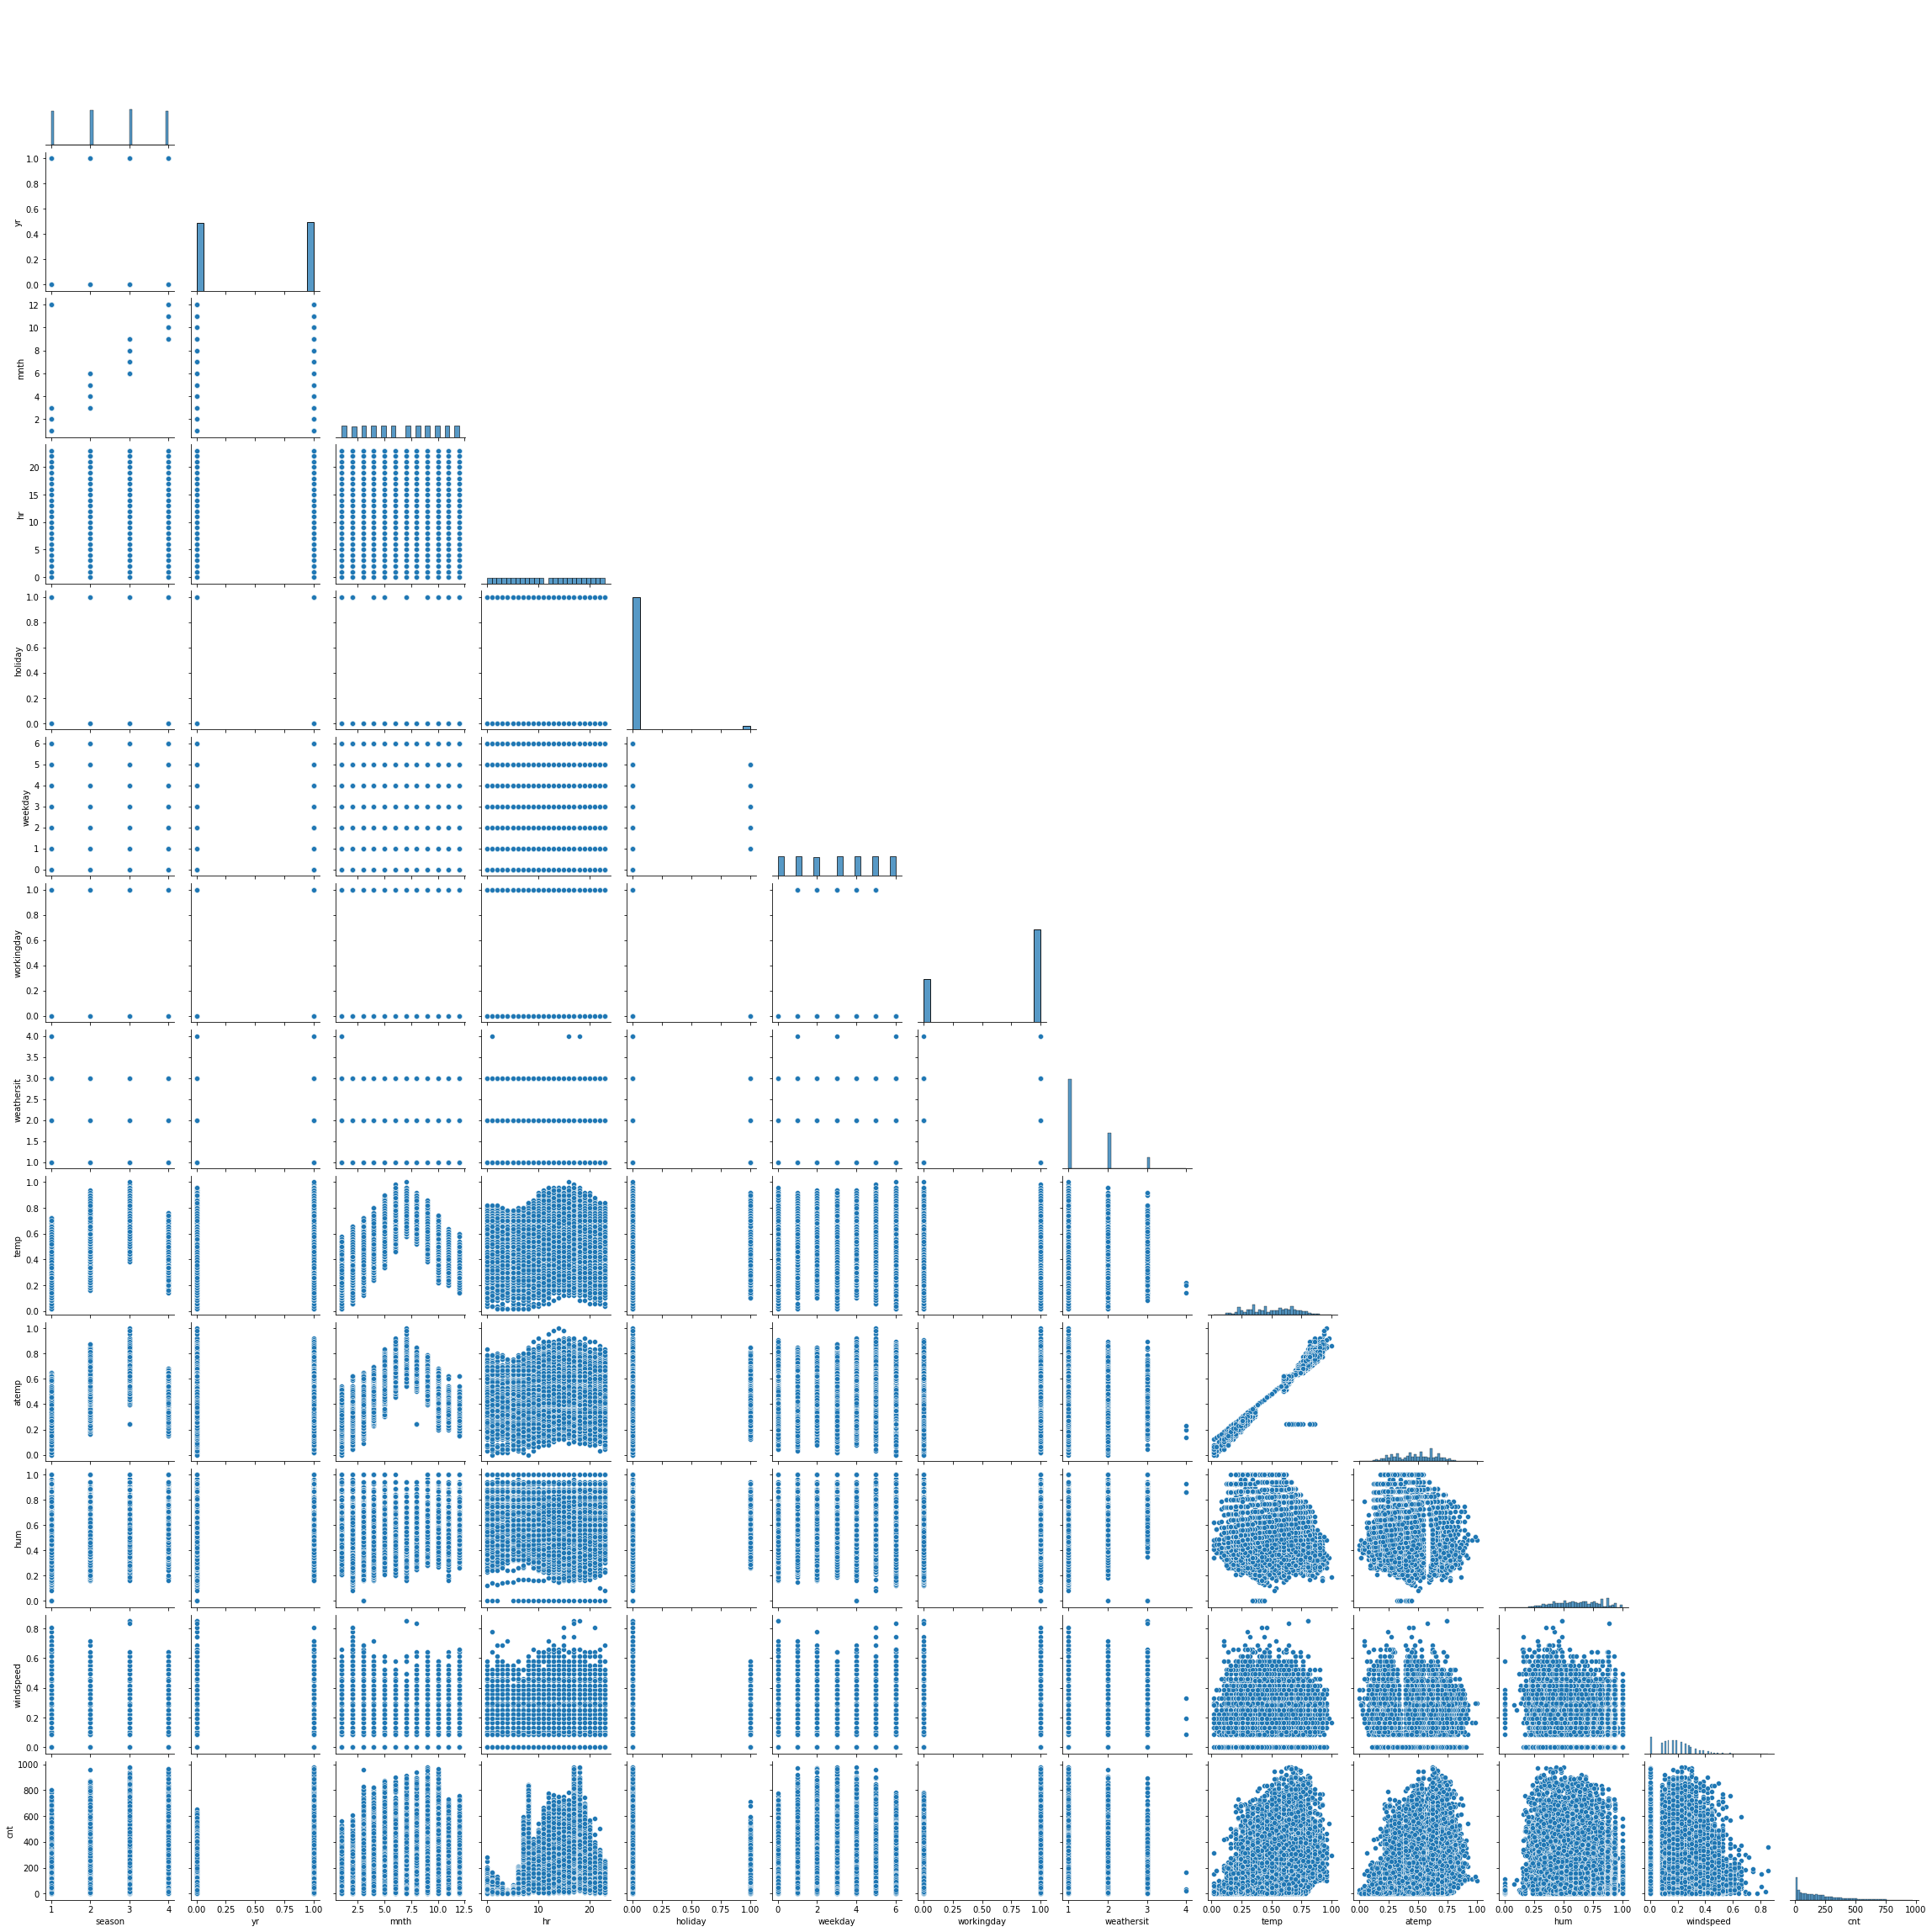

In [12]:
sns.pairplot(data,corner=True)

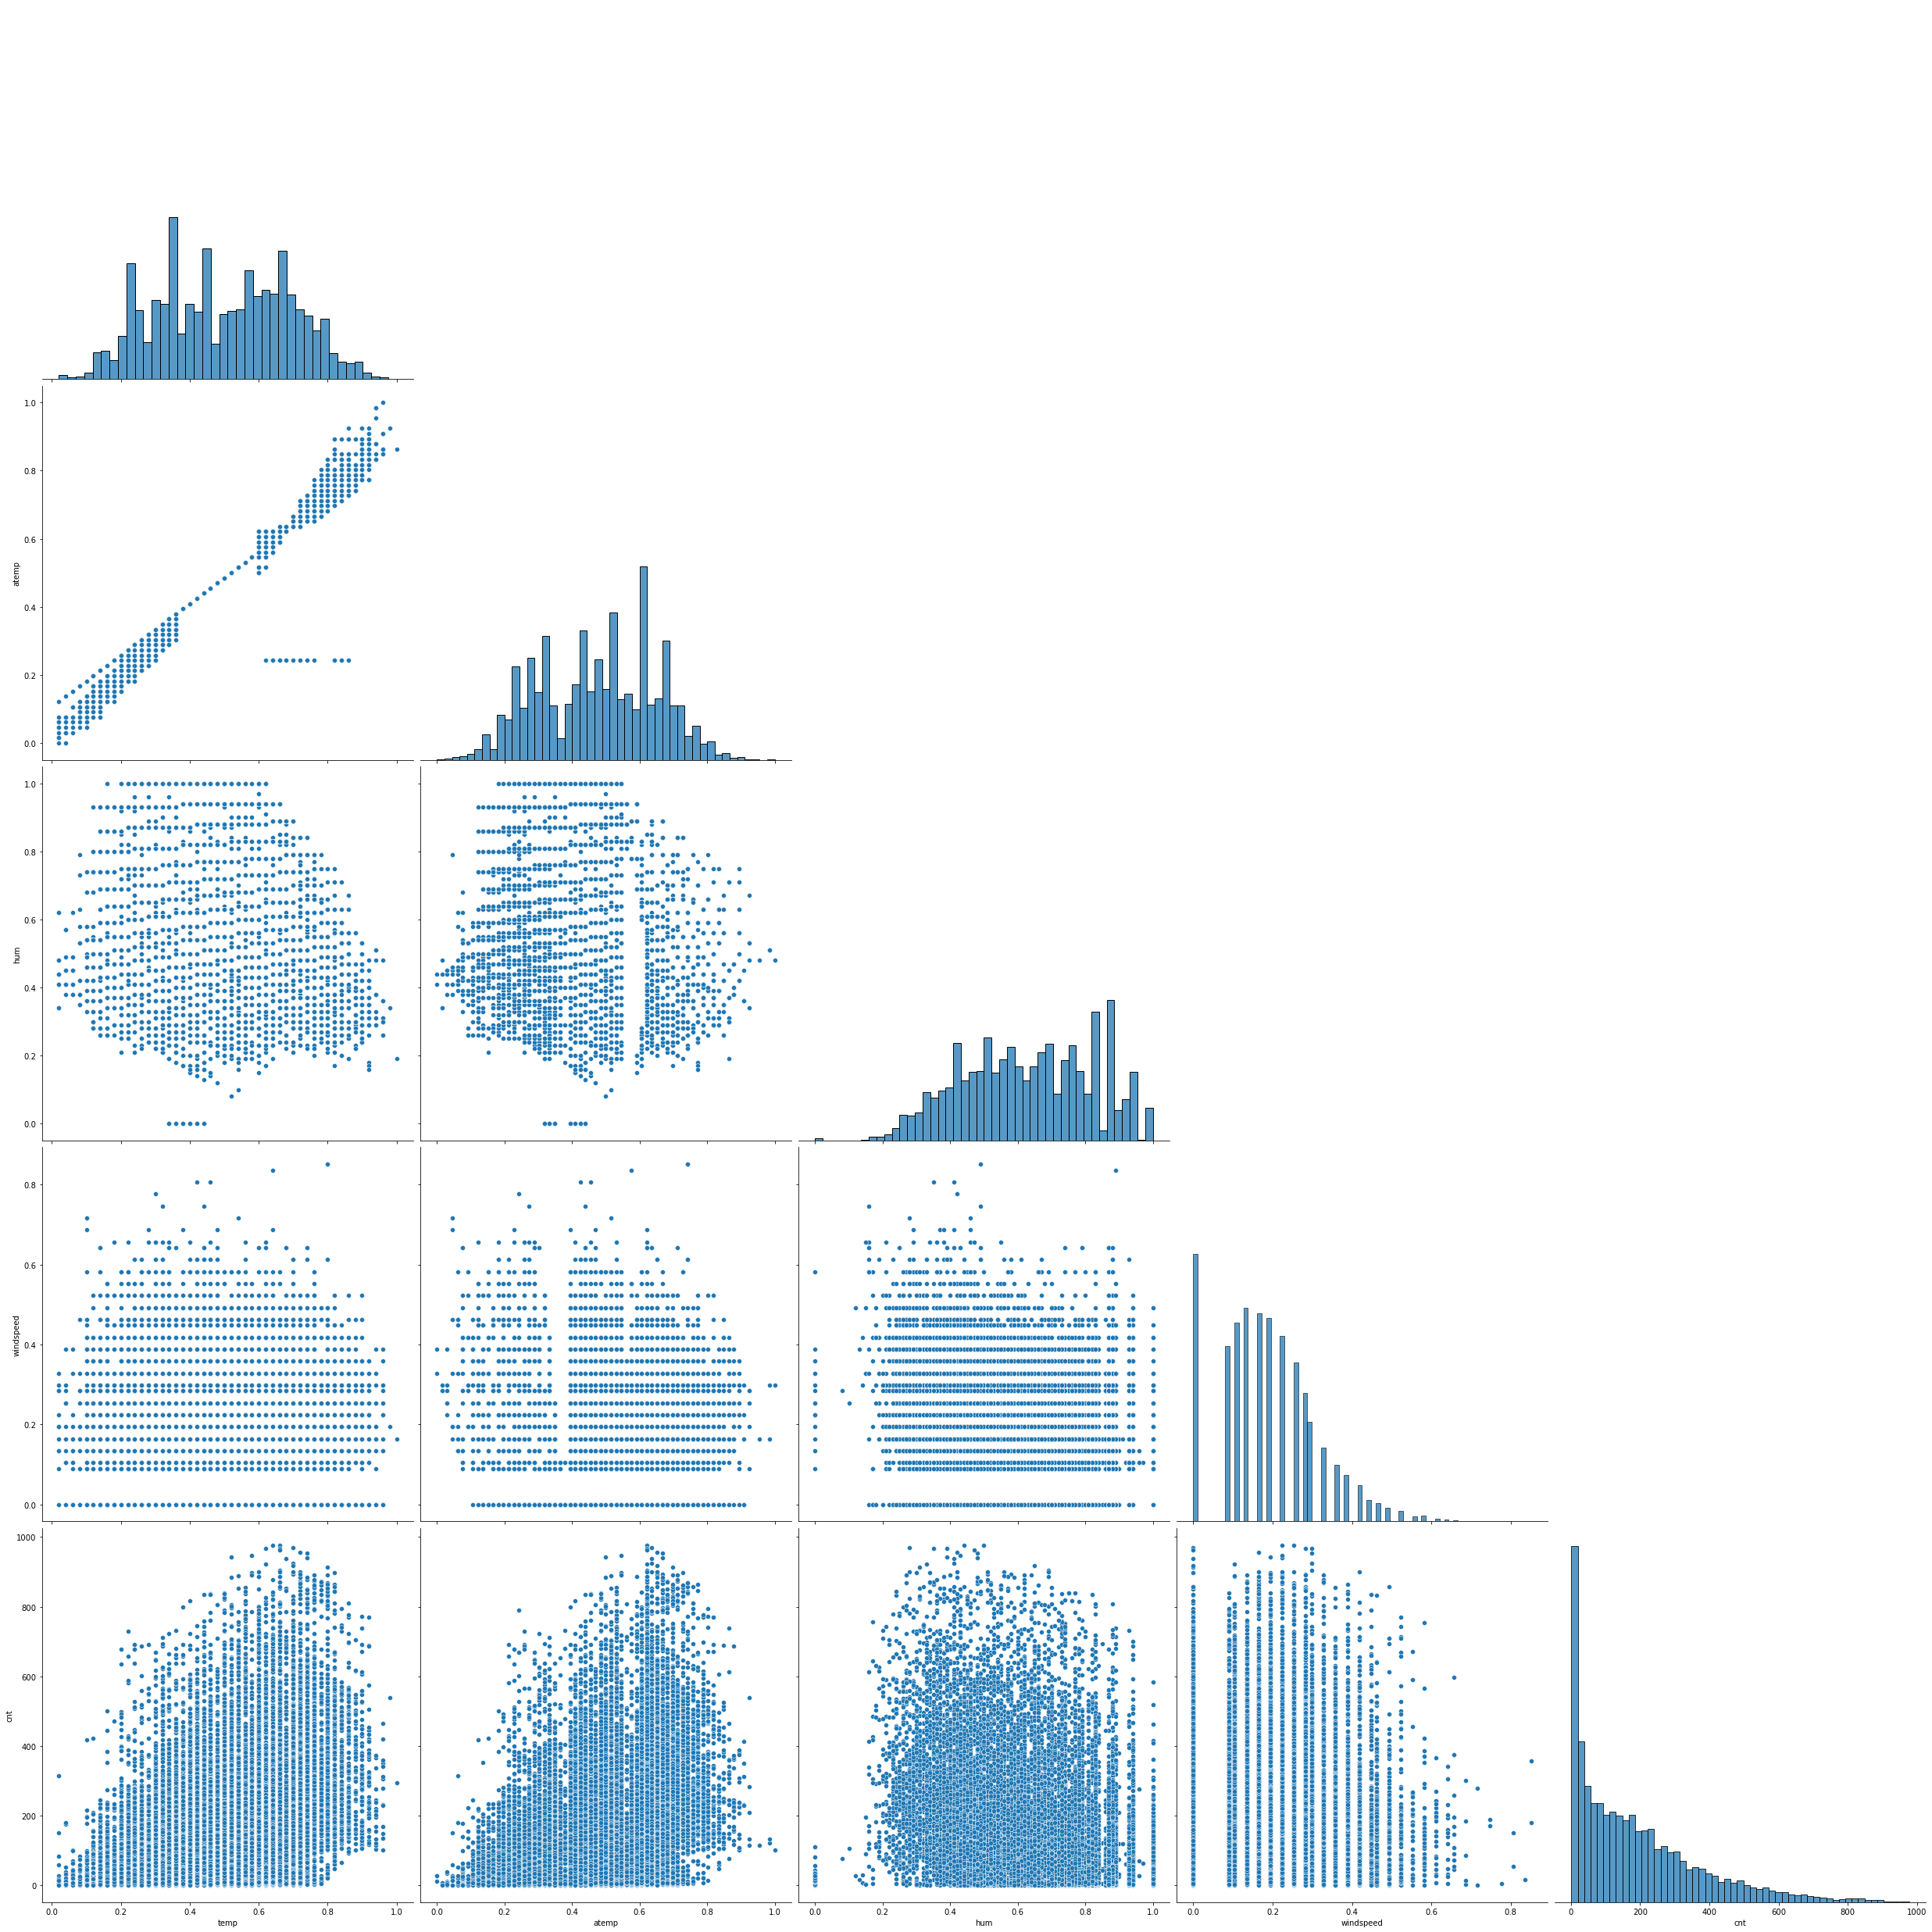

In [13]:


ax =sns.pairplot(data.iloc[:,8:], height=7,corner=True)

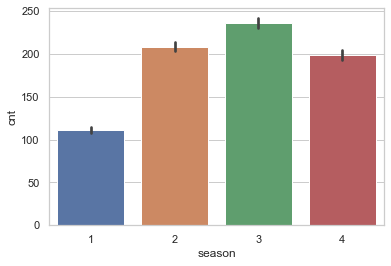

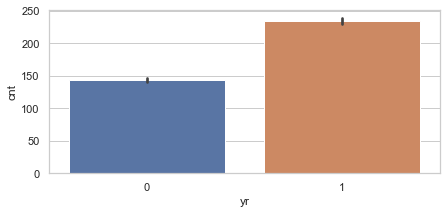

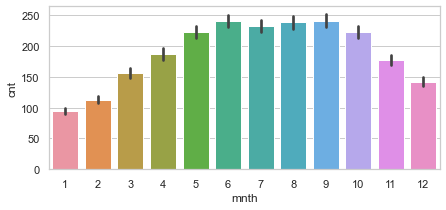

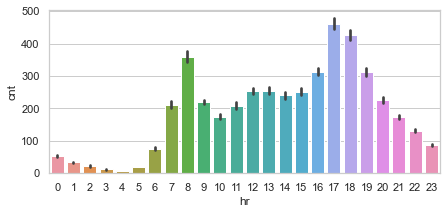

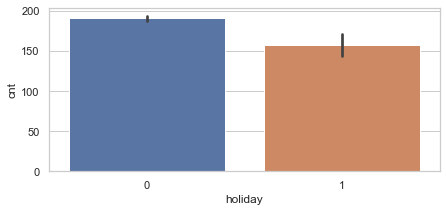

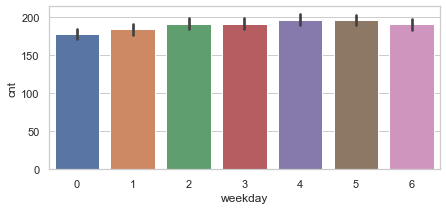

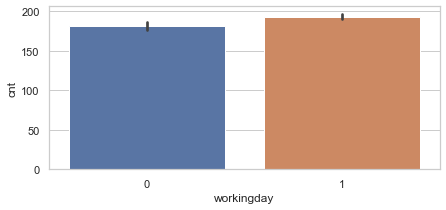

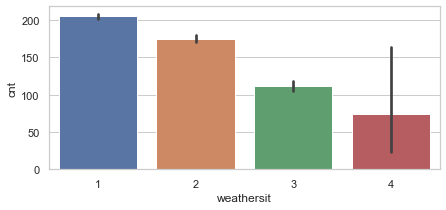

<Figure size 504x216 with 0 Axes>

In [14]:
plt.show()
for col in data.iloc[:,:8]:
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=col, y="cnt", data=data)
    plt.figure(figsize=(7,3))
    

<AxesSubplot:xlabel='mnth', ylabel='temp'>

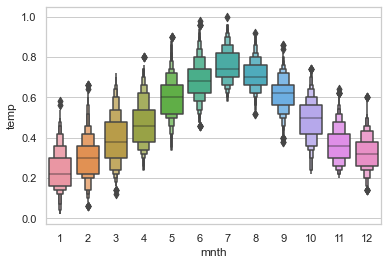

In [15]:
sns.boxenplot(x="mnth", y ="temp", data=data)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

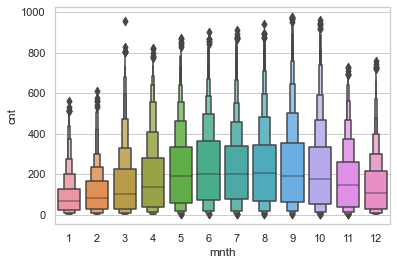

In [16]:
sns.boxenplot(x="mnth", y ="cnt", data=data)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

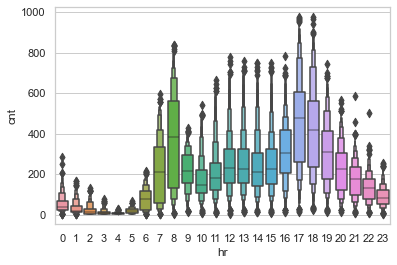

In [17]:
sns.boxenplot(x="hr", y ="cnt", data=data)

5      260
6      236
4      231
3      224
2      208
      ... 
913      1
847      1
777      1
661      1
636      1
Name: cnt, Length: 869, dtype: int64
---------------------------


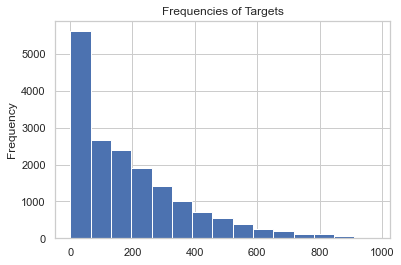

In [18]:
frequency = data['cnt'].value_counts()
print(frequency)
print("---------------------------")
plt.title('Frequencies of Targets')
data['cnt'].plot.hist(subplots=True, figsize=(20, 30), bins=15);

### Defining Dictionary Of Models

In [19]:
# MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r', 'knn_r', 'adaboost_r', 'gaussian_process_r', 'neural_network_r'}
MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r','knn_r', "adaboost", "GaussianProcessRegressor", "nn_r"}
bike_sharing_dict = {}    

## Train and Test set

In [20]:
data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
X = data.iloc[:,:-1]
y = data["cnt"]
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [22]:
for  name  in data.columns[:8]:
    X = pd.get_dummies(X,columns=[name],prefix=name)
X.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [23]:
X.shape

(17379, 61)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          17379 non-null  float64
 1   atemp         17379 non-null  float64
 2   hum           17379 non-null  float64
 3   windspeed     17379 non-null  float64
 4   season_1      17379 non-null  uint8  
 5   season_2      17379 non-null  uint8  
 6   season_3      17379 non-null  uint8  
 7   season_4      17379 non-null  uint8  
 8   yr_0          17379 non-null  uint8  
 9   yr_1          17379 non-null  uint8  
 10  mnth_1        17379 non-null  uint8  
 11  mnth_2        17379 non-null  uint8  
 12  mnth_3        17379 non-null  uint8  
 13  mnth_4        17379 non-null  uint8  
 14  mnth_5        17379 non-null  uint8  
 15  mnth_6        17379 non-null  uint8  
 16  mnth_7        17379 non-null  uint8  
 17  mnth_8        17379 non-null  uint8  
 18  mnth_9        17379 non-nu

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float).to_numpy(), y.astype(float).to_numpy(), train_size=0.85, test_size=0.15, random_state=0)



In [26]:
X_train

array([[0.62  , 0.6212, 0.35  , ..., 0.    , 0.    , 0.    ],
       [0.84  , 0.7121, 0.26  , ..., 0.    , 0.    , 0.    ],
       [0.72  , 0.6515, 0.45  , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.24  , 0.2121, 0.6   , ..., 1.    , 0.    , 0.    ],
       [0.42  , 0.4242, 0.77  , ..., 1.    , 0.    , 0.    ],
       [0.64  , 0.6212, 0.47  , ..., 0.    , 0.    , 0.    ]])

In [27]:
X_train.shape

(14772, 61)

In [28]:
X_train[:,:2]

array([[0.62  , 0.6212],
       [0.84  , 0.7121],
       [0.72  , 0.6515],
       ...,
       [0.24  , 0.2121],
       [0.42  , 0.4242],
       [0.64  , 0.6212]])

In [29]:
StScale = StandardScaler()
StScale.fit(X_train)
X_train = StScale.transform(X_train)

X_test = StScale.transform(X_test)



In [47]:
from tabulate import tabulate
def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    
    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])
    
    linear_r_predict = curr_model.predict(X_test)
    
    rmse = np.sqrt( mean_squared_error(y_test, linear_r_predict))
    model['rmse'] = rmse
    mse = mean_squared_error(y_test, linear_r_predict)
    model['mse'] = mse
    r2 = r2_score(y_test, linear_r_predict)
    model['r2'] = r2
    
    linear_r_predict_trn = curr_model.predict(X_train)
    mse_trn = mean_squared_error(y_train, linear_r_predict_trn)
    model['mse_trn'] = mse_trn
    r2_trn = r2_score(y_train, linear_r_predict_trn)
    model['r2_trn'] = r2_trn
    
    table.append(['Root Mean Squarred Error', rmse])
    table.append(['Mean Squarred Error', mse])
    table.append(['r2 Score ',r2])
    table.append(['Mean Squarred Error (train)', mse_trn])
    table.append(['r2 Score (train)',r2_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

## Linear Regression

In [31]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

## Linear Regression Analysis

In [48]:
bike_sharing_dict['linear_r'] = {'model':linear_r, 'hyperparameters':0}
model_results(bike_sharing_dict['linear_r'])

+-----------------------------+--------------+
| Parameters / Metrics        |        Tuned |
+=============================+==============+
| Root Mean Squarred Error    |   102.974    |
+-----------------------------+--------------+
| Mean Squarred Error         | 10603.6      |
+-----------------------------+--------------+
| r2 Score                    |     0.678732 |
+-----------------------------+--------------+
| Mean Squarred Error (train) | 10275.9      |
+-----------------------------+--------------+
| r2 Score (train)            |     0.68747  |
+-----------------------------+--------------+


## Support Vector Regression

In [62]:
svr = SVR(kernel='linear').fit(X_train,y_train)

In [63]:
parameters = {
    'C': scipy.stats.uniform(1, 1000), 
    'gamma': scipy.stats.uniform(0.01, 1000)
}
svr_model = RandomizedSearchCV(svr, parameters, verbose=1,n_jobs=4, n_iter=5, random_state=0).fit(X_train, y_train)
svr_model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'C': 964.6627605010293, 'gamma': 383.45151882577767}

In [64]:
svr_model.best_estimator_

SVR(C=964.6627605010293, gamma=383.45151882577767, kernel='linear')

## Support Vector Regression Analysis

In [65]:
bike_sharing_dict['svr'] = {'model':svr_model, 'hyperparameters':1}
model_results(bike_sharing_dict['svr'])

+-----------------------------+--------------+
| Parameters / Metrics        |        Tuned |
+=============================+==============+
| C                           |   964.663    |
+-----------------------------+--------------+
| gamma                       |   383.452    |
+-----------------------------+--------------+
| Root Mean Squarred Error    |   106.947    |
+-----------------------------+--------------+
| Mean Squarred Error         | 11437.7      |
+-----------------------------+--------------+
| r2 Score                    |     0.653463 |
+-----------------------------+--------------+
| Mean Squarred Error (train) | 11060.3      |
+-----------------------------+--------------+
| r2 Score (train)            |     0.663614 |
+-----------------------------+--------------+


## Decision Tree Regression

In [36]:
tree = DecisionTreeRegressor(max_features= 'auto').fit(X_train, y_train)

In [37]:
parameters = {
    'max_depth': scipy.stats.uniform(100, 1000),
    'min_samples_split': scipy.stats.uniform(0, 0.01) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=50, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'max_depth': 382.8069625764096, 'min_samples_split': 0.001201965612131689}

In [38]:
tree_model.best_params_

{'max_depth': 382.8069625764096, 'min_samples_split': 0.001201965612131689}

## Decision tree Analysis

In [49]:
bike_sharing_dict['decision_tree_r'] = {'model':tree_model, 'hyperparameters':1}
model_results(bike_sharing_dict['decision_tree_r'])

+-----------------------------+---------------+
| Parameters / Metrics        |         Tuned |
+=============================+===============+
| max_depth                   |  382.807      |
+-----------------------------+---------------+
| min_samples_split           |    0.00120197 |
+-----------------------------+---------------+
| Root Mean Squarred Error    |   63.2286     |
+-----------------------------+---------------+
| Mean Squarred Error         | 3997.86       |
+-----------------------------+---------------+
| r2 Score                    |    0.878873   |
+-----------------------------+---------------+
| Mean Squarred Error (train) | 1598.38       |
+-----------------------------+---------------+
| r2 Score (train)            |    0.951387   |
+-----------------------------+---------------+


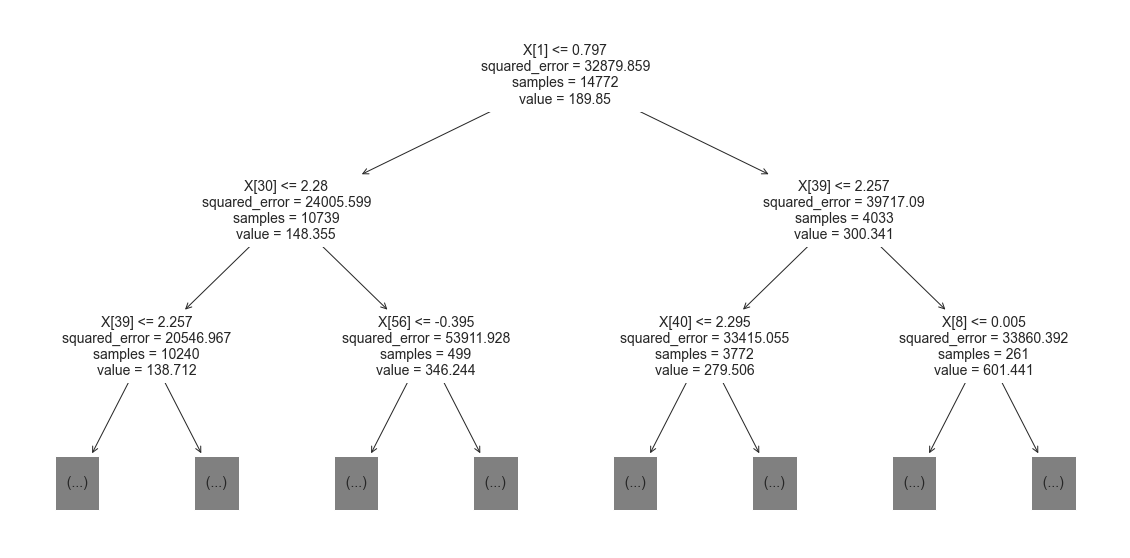

In [58]:
plt.figure(figsize=(20,10))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest Regression

In [41]:
forest = RandomForestRegressor(max_features= 'auto').fit(X_train, y_train)

In [42]:
parameters = {
    'n_estimators': range(100,150),
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 0.01) 
}
forest_model = RandomizedSearchCV(forest, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 57.84339488686485,
 'min_samples_split': 0.0001878980043635514,
 'n_estimators': 105}

In [43]:
forest_model.best_params_

{'max_depth': 57.84339488686485,
 'min_samples_split': 0.0001878980043635514,
 'n_estimators': 105}

## Random Forest Analysis

In [59]:
bike_sharing_dict['random_forest_r'] = {'model':forest_model, 'hyperparameters':1}
model_results(bike_sharing_dict['random_forest_r'])

+-----------------------------+----------------+
| Parameters / Metrics        |          Tuned |
+=============================+================+
| max_depth                   |   57.8434      |
+-----------------------------+----------------+
| min_samples_split           |    0.000187898 |
+-----------------------------+----------------+
| n_estimators                |  105           |
+-----------------------------+----------------+
| Root Mean Squarred Error    |   51.1356      |
+-----------------------------+----------------+
| Mean Squarred Error         | 2614.85        |
+-----------------------------+----------------+
| r2 Score                    |    0.920776    |
+-----------------------------+----------------+
| Mean Squarred Error (train) |  393.402       |
+-----------------------------+----------------+
| r2 Score (train)            |    0.988035    |
+-----------------------------+----------------+


## K Nearest Neighbours Regression

In [66]:
knn =  KNeighborsRegressor()

In [67]:
parameters = {
    'n_neighbors': range(1, 100), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'weights': ['uniform', 'distance'], 
    'leaf_size': scipy.stats.uniform(1, 50)
}
knn_model = RandomizedSearchCV(knn, parameters,verbose=1,random_state=0,n_iter=100, cv =10).fit(X_train, y_train)
knn_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'algorithm': 'brute',
 'leaf_size': 28.244159149844844,
 'n_neighbors': 10,
 'weights': 'distance'}

### KNN Analysis

In [68]:
bike_sharing_dict['knn'] = {'model':knn_model, 'hyperparameters':1}
model_results(bike_sharing_dict['knn'])

+-----------------------------+---------------------+
| Parameters / Metrics        | Tuned               |
+=============================+=====================+
| algorithm                   | brute               |
+-----------------------------+---------------------+
| leaf_size                   | 28.244159149844844  |
+-----------------------------+---------------------+
| n_neighbors                 | 10                  |
+-----------------------------+---------------------+
| weights                     | distance            |
+-----------------------------+---------------------+
| Root Mean Squarred Error    | 66.02799952484635   |
+-----------------------------+---------------------+
| Mean Squarred Error         | 4359.696721253109   |
+-----------------------------+---------------------+
| r2 Score                    | 0.867910372662378   |
+-----------------------------+---------------------+
| Mean Squarred Error (train) | 0.11633495802870294 |
+---------------------------

## Adaboost

In [69]:
AdaBoost = AdaBoostRegressor()

In [70]:
AdaBoost.fit(X_train,y_train)

AdaBoostRegressor()

In [71]:
param_distribution = {'learning_rate':scipy.stats.uniform(0.01,5),
                'n_estimators': range(1,250),
                'loss' : ['linear', 'square', 'exponential']}

In [72]:
adaBoost_model = RandomizedSearchCV(AdaBoost,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5, n_iter=100).fit(X_train,y_train)


adaBoost_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'learning_rate': 4.773745057584925, 'loss': 'exponential', 'n_estimators': 97}

### Adaboost Analysis

In [75]:
bike_sharing_dict['adaboost'] = {'model':adaBoost_model, 'hyperparameters':1}
model_results(bike_sharing_dict['adaboost'])

+-----------------------------+---------------------+
| Parameters / Metrics        | Tuned               |
+=============================+=====================+
| learning_rate               | 4.773745057584925   |
+-----------------------------+---------------------+
| loss                        | exponential         |
+-----------------------------+---------------------+
| n_estimators                | 97                  |
+-----------------------------+---------------------+
| Root Mean Squarred Error    | 132.18694718268225  |
+-----------------------------+---------------------+
| Mean Squarred Error         | 17473.389005477224  |
+-----------------------------+---------------------+
| r2 Score                    | 0.47059311928574166 |
+-----------------------------+---------------------+
| Mean Squarred Error (train) | 17305.123083886087  |
+-----------------------------+---------------------+
| r2 Score (train)            | 0.47368621132170774 |
+---------------------------

## GaussianProcessRegressor

In [76]:
GPR = GaussianProcessRegressor(kernel = 1.0 * RBF(1.0) ,normalize_y = True, alpha=(1e-10,))

In [77]:
param_distribution = { "alpha":scipy.stats.reciprocal(1e-11, 1e-8)}



In [ ]:
GPR_model = RandomizedSearchCV(GPR, param_distribution, cv=3, n_iter=15 ,random_state=0,verbose=1)
GPR_model.fit(X_train, y_train)
GPR_model.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

### GaussianProcessRegressor analysis

In [ ]:
bike_sharing_dict['GaussianProcessRegressor'] = {'model':GPR_model, 'hyperparameters':1}
model_results(bike_sharing_dict['GaussianProcessRegressor'])

## neural_network_regression (MLPRegressor)

In [ ]:
nn_r = MLPRegressor()

In [ ]:
param_distribution ={'max_iter': range(1000, 1500),
                     'hidden_layer_sizes': [(scipy.stats.randint(50,1000),scipy.stats.randint(50,1000),scipy.stats.randint(50,1000)), (50,50,50), (50,100,50), (100,)],
                     'learning_rate':['constant', 'invscaling', 'adaptive'],
                     'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                    'solver':["adam",'sgd'],
                    'activation':["identity",'tanh', "relu", "logistic"]   
}

In [ ]:
nnr_model = RandomizedSearchCV(nn_r,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5,n_jobs=4, n_iter=100).fit(X_train,y_train)


nnr_model.best_params_

### neural_network_regression analysis

In [ ]:
facebook_metrics_dict['nn_r'] = {'model':nnr_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['nn_r'])

### Analyzing Models for Bike Share

In [ ]:
def cross_checking_model_results(dictionary):
    table = [["Model Name", "MSE", "r2 Score","MSE (train)", "r2 Score (train)" , "RMSE"]]
    x_models = []
    y_mse = []
    y_r2 = []
    y_mse_trn = []
    y_r2_trn = []
    y_rmse = []
    
    for model_key in MODELS:
        table.append([model_key, dictionary[model_key]['mse'], dictionary[model_key]['r2'],
                                 dictionary[model_key]['mse_trn'], dictionary[model_key]['r2_trn'],
                                                         dictionary[model_key]['rmse']            ])
        x_models.append(model_key)
        y_mse.append(dictionary[model_key]['mse'])
        y_r2.append(dictionary[model_key]['r2'])
        y_mse_trn.append(dictionary[model_key]['mse_trn'])
        y_r2_trn.append(dictionary[model_key]['r2_trn'])
        y_rmse.append(dictionary[model_key]['rmse'])
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_mse, palette="viridis")
    ax1.set_title('Models and Mean Squarred Error')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_r2, palette="viridis")
    ax2.set_title('Models and r2 Score')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(qsar_aquatic_toxicity_dict)

### Regression Dictionary
Exporting Model Data for Later Analysis and Comparison

In [ ]:
with open('base_regression_dict.dictionary', 'rb') as config_dictionary_file:
    base_regression_dict = pickle.load(config_dictionary_file)

base_regression_dict['bike_sharing']= bike_sharing_dict

with open('base_regression_dict.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(base_regression_dict, config_dictionary_file)